In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import sys
path ='/content/drive/MyDrive/cod/LEA3_FIN2/data'
os.chdir(path) ## volver la carpeta de repositorio directorio de trabajo
sys.path.append(path) ## agregarla al path, para leer archivos propios como paquetes

In [4]:
# LIBRERIAS
import numpy as np
import pandas as pd
import plotly.graph_objs as go ### para gráficos
import plotly.express as px
## import a_funciones as fn
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
Historicos= pd.read_csv('datos_historicos.csv')

In [6]:
Historicos.info()
Historicos.describe()
Historicos.isnull().sum()
Historicos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               10000 non-null  int64  
 1   CreditScore                      10000 non-null  int64  
 2   DebtRatio                        10000 non-null  float64
 3   Assets                           10000 non-null  int64  
 4   Age                              10000 non-null  int64  
 5   NumberOfDependents               10000 non-null  int64  
 6   NumberOfOpenCreditLinesAndLoans  10000 non-null  int64  
 7   MonthlyIncome                    10000 non-null  int64  
 8   NumberOfTimesPastDue             10000 non-null  int64  
 9   EmploymentLength                 10000 non-null  int64  
 10  HomeOwnership                    10000 non-null  object 
 11  Education                        10000 non-null  object 
 12  MaritalStatus      

,ID,CreditScore,DebtRatio,Assets,Age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,MonthlyIncome,NumberOfTimesPastDue,EmploymentLength,HomeOwnership,Education,MaritalStatus,YearsAtCurrentAddress,NoPaidPerc
0,1,384,0.016560,37950,20,0,2,17355,9,28,Mortgage,Bachelor,Divorced,18,0.196566
1,2,516,0.138825,22909,46,5,8,7175,13,0,Rent,Bachelor,Married,9,0.264438
2,3,638,0.391149,126521,80,5,7,1910,6,25,Rent,Bachelor,Single,9,0.287568
3,4,363,0.463521,39543,54,9,0,19339,5,22,Own,High School,Widowed,3,0.181348
4,5,804,0.504824,38522,72,1,10,7928,18,19,Own,PhD,Married,5,0.343376


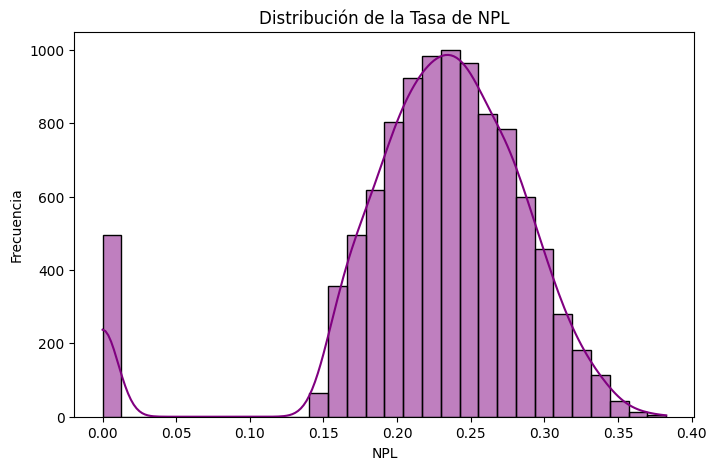

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(Historicos['NoPaidPerc'], kde=True, bins=30, color='purple')
plt.title('Distribución de la Tasa de NPL')
plt.xlabel('NPL')
plt.ylabel('Frecuencia')
plt.show()

In [8]:
Maximo= Historicos['NoPaidPerc'].max()
print('El valor maximo de porcentaje no pagado por un usuario de banca fue historicamente de : ',Maximo)
Minimo= Historicos['NoPaidPerc'].min()
print('El valor minimo de porcentaje no pagado por un usuario de banca fue historicamente de : ',Minimo)

El valor maximo de porcentaje no pagado por un usuario de banca fue historicamente de :  0.38279152
El valor minimo de porcentaje no pagado por un usuario de banca fue historicamente de :  0.0


In [9]:
print(Historicos['NoPaidPerc'].describe())

# Valores únicos
print(Historicos['NoPaidPerc'].unique())

count    10000.000000
mean         0.226052
std          0.067179
min          0.000000
25%          0.198827
50%          0.233158
75%          0.267660
max          0.382792
Name: NoPaidPerc, dtype: float64
[0.19656637 0.2644376  0.28756785 ... 0.2379866  0.18039401 0.24172479]


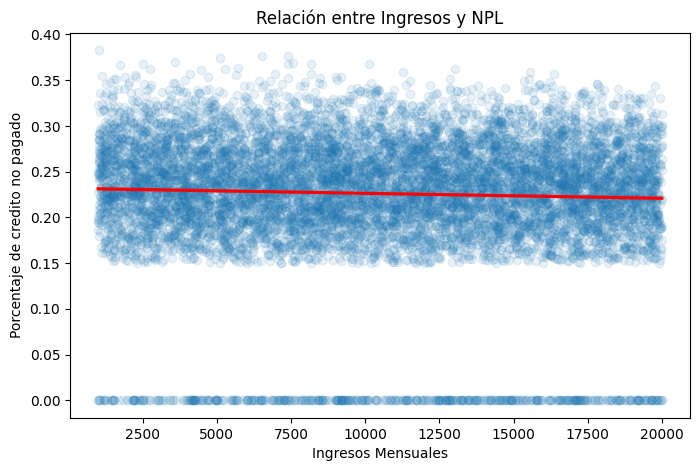

In [10]:
# NPL vs Ingresos
plt.figure(figsize=(8, 5))
sns.regplot(x='MonthlyIncome', y='NoPaidPerc', data=Historicos, scatter_kws={'alpha':0.1}, line_kws={"color":"red"})
plt.title('Relación entre Ingresos y NPL')
plt.xlabel('Ingresos Mensuales')
plt.ylabel('Porcentaje de credito no pagado')
plt.show()


In [11]:
promedio= Historicos['NoPaidPerc'].mean()
print('El promedio de porcentaje no pagado por un usuario de banca fue historicamente de : ',promedio)

El promedio de porcentaje no pagado por un usuario de banca fue historicamente de :  0.22605195131300002


## Analisís
Adicionalmente vemos que hay varios niveles que es el pago total de los creditos y que apartir del 15% se NPP hasta cerca del 40% pero no ha historicos entre los otros rangos es decir que no hay nadie que tenga un NPPerc entre mas del 1 y menos del 15%

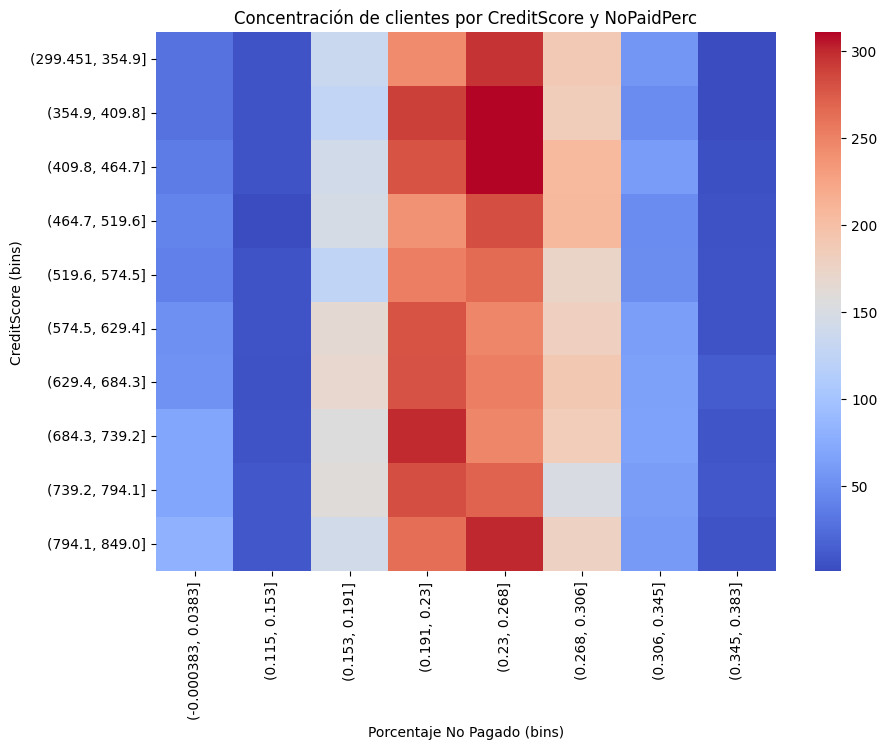

In [12]:
credit_bins = pd.cut(Historicos['CreditScore'], bins=10)
nopaid_bins = pd.cut(Historicos['NoPaidPerc'], bins=10)

heatmap_data = pd.crosstab(credit_bins, nopaid_bins)

plt.figure(figsize=(10,7))
sns.heatmap(heatmap_data, cmap='coolwarm')
plt.title('Concentración de clientes por CreditScore y NoPaidPerc')
plt.xlabel('Porcentaje No Pagado (bins)')
plt.ylabel('CreditScore (bins)')
plt.show()

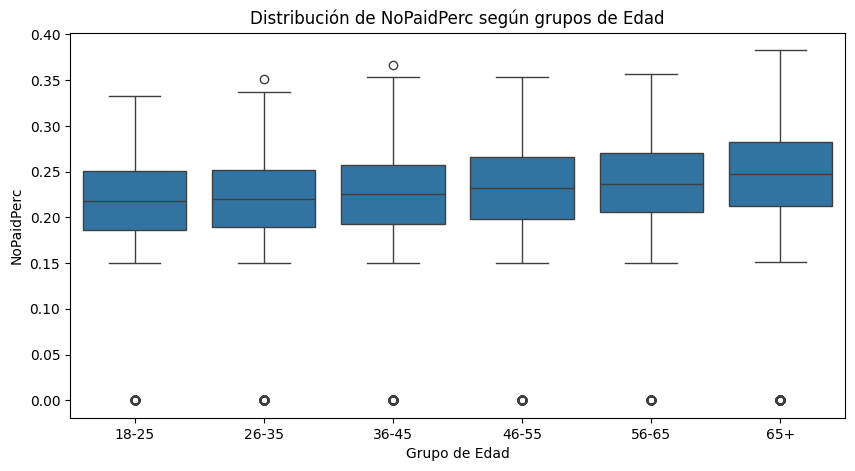

In [13]:

# Agrupar Age en rangos y analizar con boxplot
Historicos['AgeGroup'] = pd.cut(Historicos['Age'], bins=[18,25,35,45,55,65,100], labels=['18-25','26-35','36-45','46-55','56-65','65+'])

plt.figure(figsize=(10,5))
sns.boxplot(x='AgeGroup', y='NoPaidPerc', data=Historicos)
plt.title('Distribución de NoPaidPerc según grupos de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('NoPaidPerc')
plt.show()


In [14]:
print(Historicos.groupby("AgeGroup")["NoPaidPerc"].describe())


           count      mean       std  min       25%       50%       75%  \
AgeGroup                                                                  
18-25      961.0  0.209090  0.066453  0.0  0.186115  0.217644  0.250646   
26-35     1410.0  0.211598  0.067154  0.0  0.189457  0.220282  0.251456   
36-45     1472.0  0.217606  0.066184  0.0  0.192434  0.225690  0.257111   
46-55     1371.0  0.223034  0.069122  0.0  0.198176  0.232642  0.266326   
56-65     1390.0  0.230956  0.062821  0.0  0.205933  0.236082  0.270721   
65+       3267.0  0.240940  0.065150  0.0  0.212535  0.247072  0.282544   

               max  
AgeGroup            
18-25     0.332969  
26-35     0.351850  
36-45     0.366159  
46-55     0.353835  
56-65     0.357123  
65+       0.382792  


<ipython-input-14-c1b6d9b00f1c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(Historicos.groupby("AgeGroup")["NoPaidPerc"].describe())


In [15]:
correlation = Historicos["Age"].corr(Historicos["NoPaidPerc"])
print(f"Correlación entre edad y porcentaje de impago: {correlation:.2f}")


Correlación entre edad y porcentaje de impago: 0.18


<ipython-input-16-421a4105a9aa>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_impago = Historicos.groupby("AgeGroup")["NoPaidPerc"].mean()


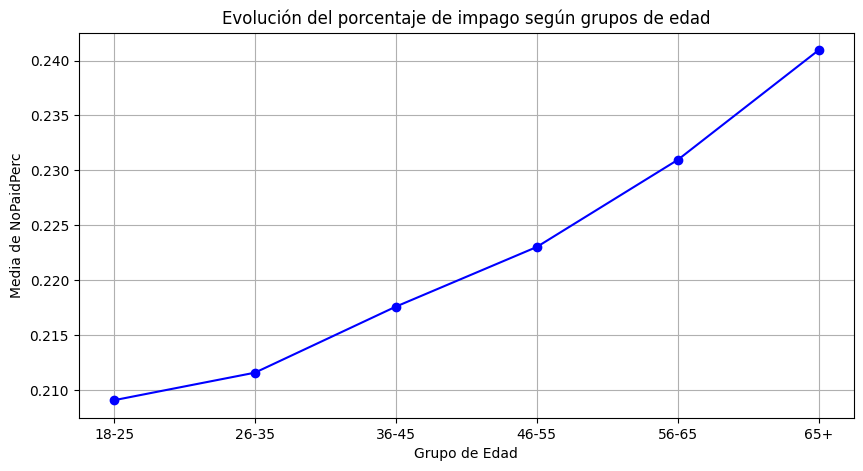

In [16]:
import numpy as np
mean_impago = Historicos.groupby("AgeGroup")["NoPaidPerc"].mean()
plt.figure(figsize=(10, 5))
plt.plot(mean_impago.index, mean_impago.values, marker='o', linestyle='-', color='b')
plt.xlabel("Grupo de Edad")
plt.ylabel("Media de NoPaidPerc")
plt.title("Evolución del porcentaje de impago según grupos de edad")
plt.grid(True)
plt.show()


In [17]:


# Calcular los cuartiles y el IQR por grupo de edad
q1 = Historicos.groupby("AgeGroup")["NoPaidPerc"].quantile(0.25)
q3 = Historicos.groupby("AgeGroup")["NoPaidPerc"].quantile(0.75)
iqr = q3 - q1

# Definir los límites para outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Contar los outliers por grupo de edad
outliers_count = (Historicos.groupby("AgeGroup")
                  .apply(lambda x: ((x["NoPaidPerc"] < lower_bound[x.name]) |
                                    (x["NoPaidPerc"] > upper_bound[x.name])).sum()))

# Mostrar el número de datos atípicos por grupo de edad
print(outliers_count)

AgeGroup
18-25     61
26-35     90
36-45     82
46-55     79
56-65     54
65+      121
dtype: int64


<ipython-input-17-1a2805b4ba49>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  q1 = Historicos.groupby("AgeGroup")["NoPaidPerc"].quantile(0.25)
<ipython-input-17-1a2805b4ba49>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  q3 = Historicos.groupby("AgeGroup")["NoPaidPerc"].quantile(0.75)
<ipython-input-17-1a2805b4ba49>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  outliers_count = (Historicos.groupby("AgeGroup")
<

In [18]:
# Contar el total de registros por grupo de edad
total_por_grupo = Historicos.groupby("AgeGroup")["NoPaidPerc"].count()

#  porcentaje de outliers por grupo de edad
porcentaje_outliers_por_grupo = (outliers_count / total_por_grupo) * 100
print(porcentaje_outliers_por_grupo)


AgeGroup
18-25    6.347555
26-35    6.382979
36-45    5.570652
46-55    5.762217
56-65    3.884892
65+      3.703704
dtype: float64


<ipython-input-18-590c490486e2>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_por_grupo = Historicos.groupby("AgeGroup")["NoPaidPerc"].count()


A mayor nivel de endeudamiento mayor es la tasa de impago

In [88]:


# Lista de variables numéricas
numeric_vars = Historicos.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Configurar la cantidad de gráficos por fila
num_graficos = len(numeric_vars)
columnas = 2  # Número de columnas en el gráfico
filas = num_graficos // columnas + (num_graficos % columnas > 0)  # Calcula filas necesarias

# Iterar por bloques de 4 variables
for i in range(0, num_graficos, 6):
    fig, axes = plt.subplots(3, 2, figsize=(20, 15))  # Crear una matriz de gráficos

    for j, ax in enumerate(axes.flatten()):
        if i + j < num_graficos:  # Verificar que no exceda la lista de variables
            var = numeric_vars[i + j]
            sns.regplot(x=Historicos[var], y=Historicos['NoPaidPerc'],
                        scatter_kws={'alpha': 0.1}, line_kws={"color": "red"}, ax=ax)
            ax.set_title(f'Relación entre {var} y NoPaidPerc')
            ax.set_xlabel(var)
            ax.set_ylabel('Porcentaje de crédito no pagado')

    plt.tight_layout()  # Ajustar espaciado entre gráficos
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

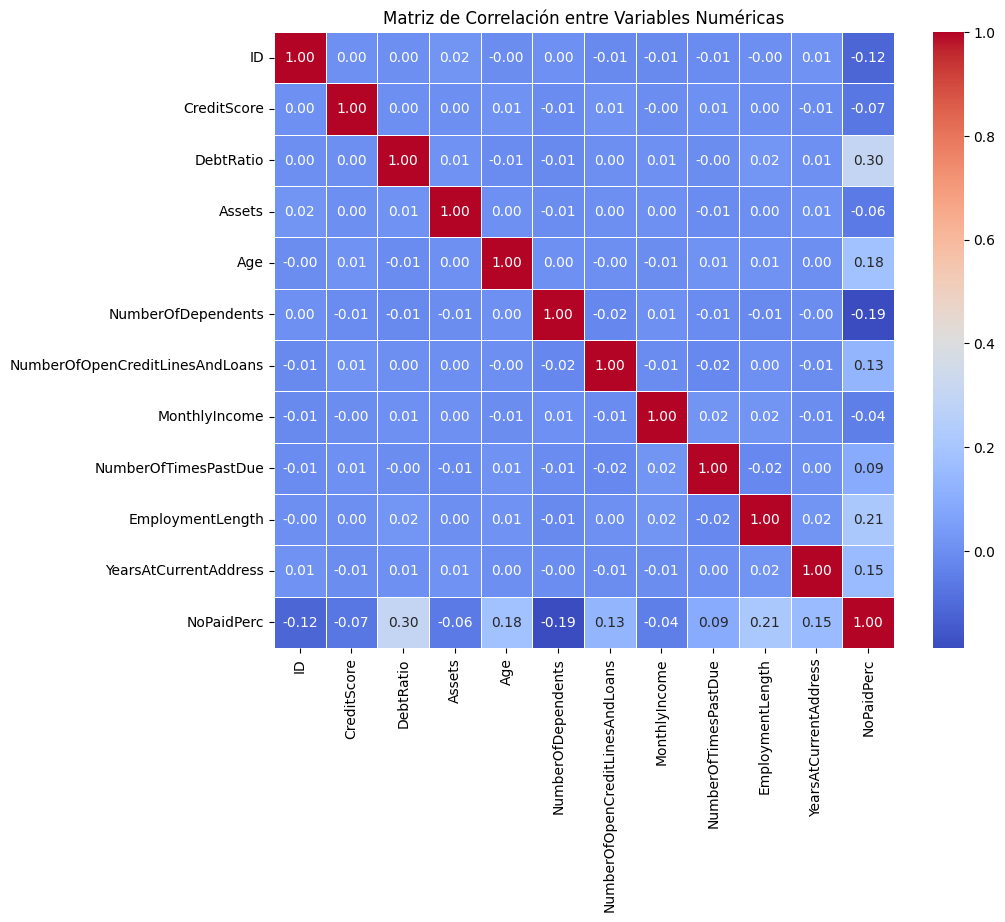

In [67]:



# Calcular la matriz de correlación
correlation_matrix = Historicos[numeric_vars].corr()


# Visualización con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

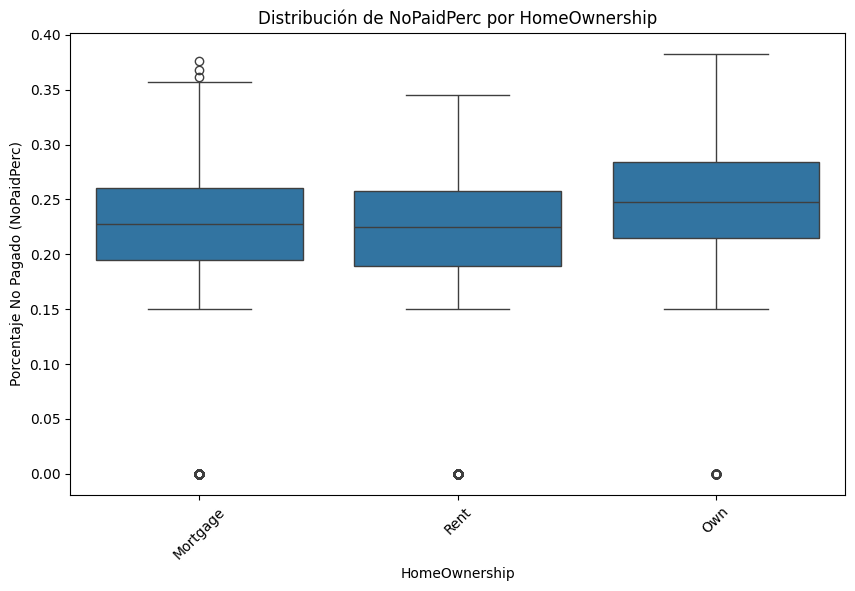

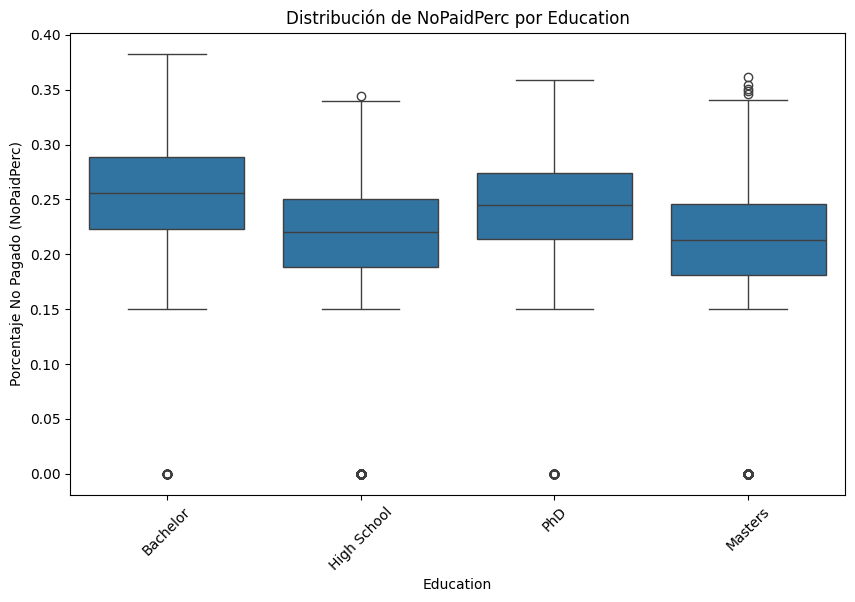

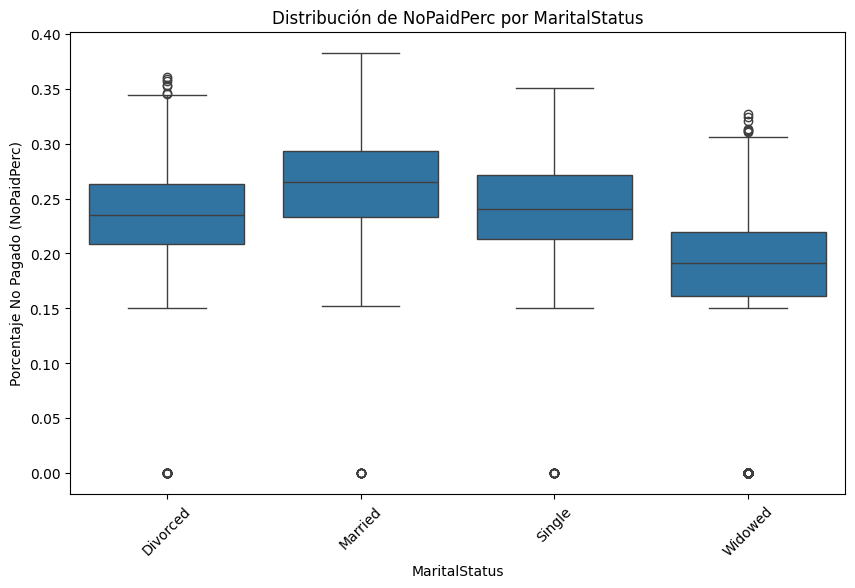

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_vars= Historicos.select_dtypes(include=['object', 'category']).columns.tolist()

for var in categorical_vars:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=var, y='NoPaidPerc', data=Historicos)
    plt.title(f'Distribución de NoPaidPerc por {var}')
    plt.xlabel(var)
    plt.ylabel('Porcentaje No Pagado (NoPaidPerc)')
    plt.xticks(rotation=45)
    plt.show()

In [68]:
Historicos.groupby('MaritalStatus')['NoPaidPerc'].mean().sort_values()

,NoPaidPerc
MaritalStatus,
Widowed,0.168639
Divorced,0.234771
Single,0.241019
Married,0.262579


# Para categoricas

In [69]:
import scipy.stats as stats

for cat in categorical_vars:
    grupos = [Historicos[Historicos[cat] == valor]["NoPaidPerc"] for valor in Historicos[cat].unique()]
    anova_result = stats.f_oneway(*grupos)
    print(f"Variable: {cat}")
    print(f"F: {anova_result.statistic:.4f}, p-value: {anova_result.pvalue:.4f}\n")

Variable: HomeOwnership
F: 246.8933, p-value: 0.0000

Variable: Education
F: 371.6045, p-value: 0.0000

Variable: MaritalStatus
F: 1267.3359, p-value: 0.0000



# ANALISIS:
Se puede apreciar que los usuarios que no estan casados, tienen una tasa de no pago promedio inferior a los que si se encuentran casados

Para aquellos que cuentan casa propia se ve un aumento en el NPPerc, se puede asumir un prestamo a largo plazo y que aun no han pagado la totalidad del prestamo.

No hay un relación clara con la cantidad de credito no pagada con el nivel de formación academica.

en resumen de las variables categoricas la que tiene mayor influencia lo que sugiere que el estado civil del cliente es un fuerte predictor del riesgo de impago


# estandarizar variables, y dummizar otras

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [77]:

Historicos_dummies = pd.get_dummies(Historicos[categorical_vars], columns=categoricas, drop_first=True)

# Ver las primeras filas para verificar la transformación
print(Historicos_dummies.head())


   HomeOwnership_Own  HomeOwnership_Rent  Education_High School  \
0              False               False                  False   
1              False                True                  False   
2              False                True                  False   
3               True               False                   True   
4               True               False                  False   

   Education_Masters  Education_PhD  MaritalStatus_Married  \
0              False          False                  False   
1              False          False                   True   
2              False          False                  False   
3              False          False                  False   
4              False           True                   True   

   MaritalStatus_Single  MaritalStatus_Widowed  
0                 False                  False  
1                 False                  False  
2                  True                  False  
3                 False     

In [89]:
Historicos_noscaled = Historicos[['ID', 'NoPaidPerc']].reset_index(drop=True)

In [90]:
from sklearn.preprocessing import RobustScaler
# Escalar variables numéricas
scaler = RobustScaler()
Historicos_Scaled = pd.DataFrame(scaler.fit_transform(Historicos[numeric_vars]), columns=numeric_vars)

In [91]:
Historicos_final = pd.concat([Historicos_Scaled, Historicos_dummies,Historicos_noscaled], axis=1)

In [92]:
Historicos_final.describe()

,ID,CreditScore,DebtRatio,Assets,Age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,MonthlyIncome,NumberOfTimesPastDue,EmploymentLength,YearsAtCurrentAddress,NoPaidPerc,ID,NoPaidPerc
count,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.00000,10000.000000
mean,2.273737e-17,-0.012011,-4.065681e-03,-0.008545,0.006111,-0.099300,0.045290,0.002079,-0.051110,-0.026747,0.028060,-1.032410e-01,5000.50000,0.226052
std,5.774369e-01,0.570680,5.849813e-01,0.580156,0.585840,0.572406,0.572921,0.579455,0.576659,0.575605,0.580675,9.759653e-01,2886.89568,0.067179
min,-1.000000e+00,-1.007168,-1.019455e+00,-1.012080,-0.992908,-1.000000,-0.900000,-1.002313,-1.000000,-1.000000,-0.933333,-3.387293e+00,1.00000,0.000000
25%,-5.000000e-01,-0.512545,-5.067230e-01,-0.517378,-0.489362,-0.600000,-0.500000,-0.500625,-0.600000,-0.533333,-0.466667,-4.987614e-01,2500.75000,0.198827
50%,0.000000e+00,0.000000,1.128045e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.016142e-16,5000.50000,0.233158
75%,5.000000e-01,0.487455,4.932770e-01,0.482622,0.510638,0.400000,0.500000,0.499375,0.400000,0.466667,0.533333,5.012386e-01,7500.25000,0.267660
max,1.000000e+00,0.960573,1.012254e+00,0.997797,1.021277,0.800000,1.000000,1.017625,0.900000,0.933333,1.000000,2.173850e+00,10000.00000,0.382792


In [93]:
print(Historicos_final.head())
print(Historicos_final.columns)

       ID  CreditScore  DebtRatio    Assets       Age  NumberOfDependents  \
0 -1.0000    -0.706093  -0.985874 -0.811714 -0.936170                -1.0   
1 -0.9998    -0.232975  -0.737417 -0.979684 -0.198582                 0.0   
2 -0.9996     0.204301  -0.224666  0.177401  0.765957                 0.0   
3 -0.9994    -0.781362  -0.077598 -0.793924  0.028369                 0.8   
4 -0.9992     0.799283   0.006335 -0.805326  0.539007                -0.8   

   NumberOfOpenCreditLinesAndLoans  MonthlyIncome  NumberOfTimesPastDue  \
0                             -0.7       0.736688                  -0.1   
1                             -0.1      -0.345801                   0.3   
2                             -0.2      -0.905654                  -0.4   
3                             -0.9       0.947657                  -0.5   
4                              0.1      -0.265731                   0.8   

   EmploymentLength  ...  HomeOwnership_Own  HomeOwnership_Rent  \
0          0.866667

In [94]:
X.shape

(10000, 18)

In [95]:
y.shape

(10000,)

In [101]:
from sklearn.model_selection import train_test_split

# Asegúrate que X e y tengan el mismo número de filas
X = Historicos_final.drop(columns=['ID', 'NoPaidPerc'])
y = Historicos_final['NoPaidPerc']

# División
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [102]:
print(X_train.shape)
print(y_train.shape)

(7000, 18)
(7000, 2)


In [103]:
# Inicializar y entrenar modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test)

In [104]:
# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")  # Error absoluto medio
print(f"RMSE: {rmse:.4f}")  # Error cuadrático medio
print(f"R²: {r2:.4f}")  # Coeficiente de determinación

MAE: 0.2090
RMSE: 0.3923
R²: 0.6734


In [106]:
from sklearn.ensemble import RandomForestRegressor


In [107]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [108]:
y_pred_rf = rf_model.predict(X_test)


In [109]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MAE: {mae_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"R²: {r2_rf:.4f}")


MAE: 0.1727
RMSE: 0.3398
R²: 0.7549


In [110]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

modelo = RandomForestRegressor(random_state=42)
scores = cross_val_score(modelo, X, y, cv=5, scoring='r2')

print(f"R² promedio: {scores.mean():.4f}")
print(f"R² por fold: {scores}")

R² promedio: 0.7455
R² por fold: [0.73788047 0.76804772 0.76145738 0.75058555 0.70948608]


# Afinamiento de Hiper

In [113]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import randint

# Separar variables predictoras y objetivo
X = Historicos_final.drop(columns='NoPaidPerc')
y = Historicos_final['NoPaidPerc']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo base
rf = RandomForestRegressor(random_state=42)

# Espacio de búsqueda
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Entrenar
random_search.fit(X_train, y_train)

# Mejor modelo
best_model = random_search.best_estimator_

# Predicción
y_pred = best_model.predict(X_test)

# Métricas
print("Mejores parámetros:", random_search.best_params_)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
105 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
63 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils

Mejores parámetros: {'max_depth': 23, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 271}
MAE: 0.17345688776076013
RMSE: 0.35817030377562215
R²: 0.731507670596028


In [112]:
# Métricas
print("Mejores parámetros:", random_search.best_params_)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

Mejores parámetros: {'max_depth': 23, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 271}
MAE: 0.17345688776076013
RMSE: 0.35817030377562215
R²: 0.731507670596028


#Clustering

In [126]:
# Selección y escalado
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
X_cluster = Historicos_final.drop(['ID', 'NoPaidPerc'], axis=1)
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_cluster)

In [127]:
kmeans = KMeans(n_clusters=8, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Añade la etiqueta de cluster al DataFrame original
Historicos_final['Cluster'] = clusters

In [128]:
for c in sorted(Historicos_final['Cluster'].unique()):
    df_c = Historicos_final[Historicos_final['Cluster'] == c]
    X = df_c.drop(['ID', 'NoPaidPerc', 'Cluster'], axis=1)
    y = df_c['NoPaidPerc']

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    print(f'Cluster {c} - R²: {r2_score(y, y_pred):.4f}')

Cluster 0 - R²: 0.7269
Cluster 1 - R²: 0.7117
Cluster 2 - R²: 0.6800
Cluster 3 - R²: 0.6793
Cluster 4 - R²: 0.7440
Cluster 5 - R²: 0.7480
Cluster 6 - R²: 0.7041
Cluster 7 - R²: 0.6997
